<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Python/Assignments/ML_Decision_Trees_Loan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#!pip install --upgrade scikit-learn==0.20.3

In [155]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [156]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

In [157]:
df.head()

credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]

In [158]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [159]:
# May have to drop not.fully.paid, installment
# or test seperately to see if there is a change in the machine learning
# purpose column is what we will predict

In [160]:
df_2 = df.drop(['installment','not.fully.paid'], axis = 1 )

In [161]:
df_2.head()

credit.policy             purpose  ...  delinq.2yrs  pub.rec
0              1  debt_consolidation  ...            0        0
1              1         credit_card  ...            0        0
2              1  debt_consolidation  ...            0        0
3              1  debt_consolidation  ...            0        0
4              1         credit_card  ...            1        0

[5 rows x 12 columns]

# EDA

In [162]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB


In [163]:
df_2.describe()

credit.policy     int.rate  ...  delinq.2yrs      pub.rec
count    9578.000000  9578.000000  ...  9578.000000  9578.000000
mean        0.804970     0.122640  ...     0.163708     0.062122
std         0.396245     0.026847  ...     0.546215     0.262126
min         0.000000     0.060000  ...     0.000000     0.000000
25%         1.000000     0.103900  ...     0.000000     0.000000
50%         1.000000     0.122100  ...     0.000000     0.000000
75%         1.000000     0.140700  ...     0.000000     0.000000
max         1.000000     0.216400  ...    13.000000     5.000000

[8 rows x 11 columns]

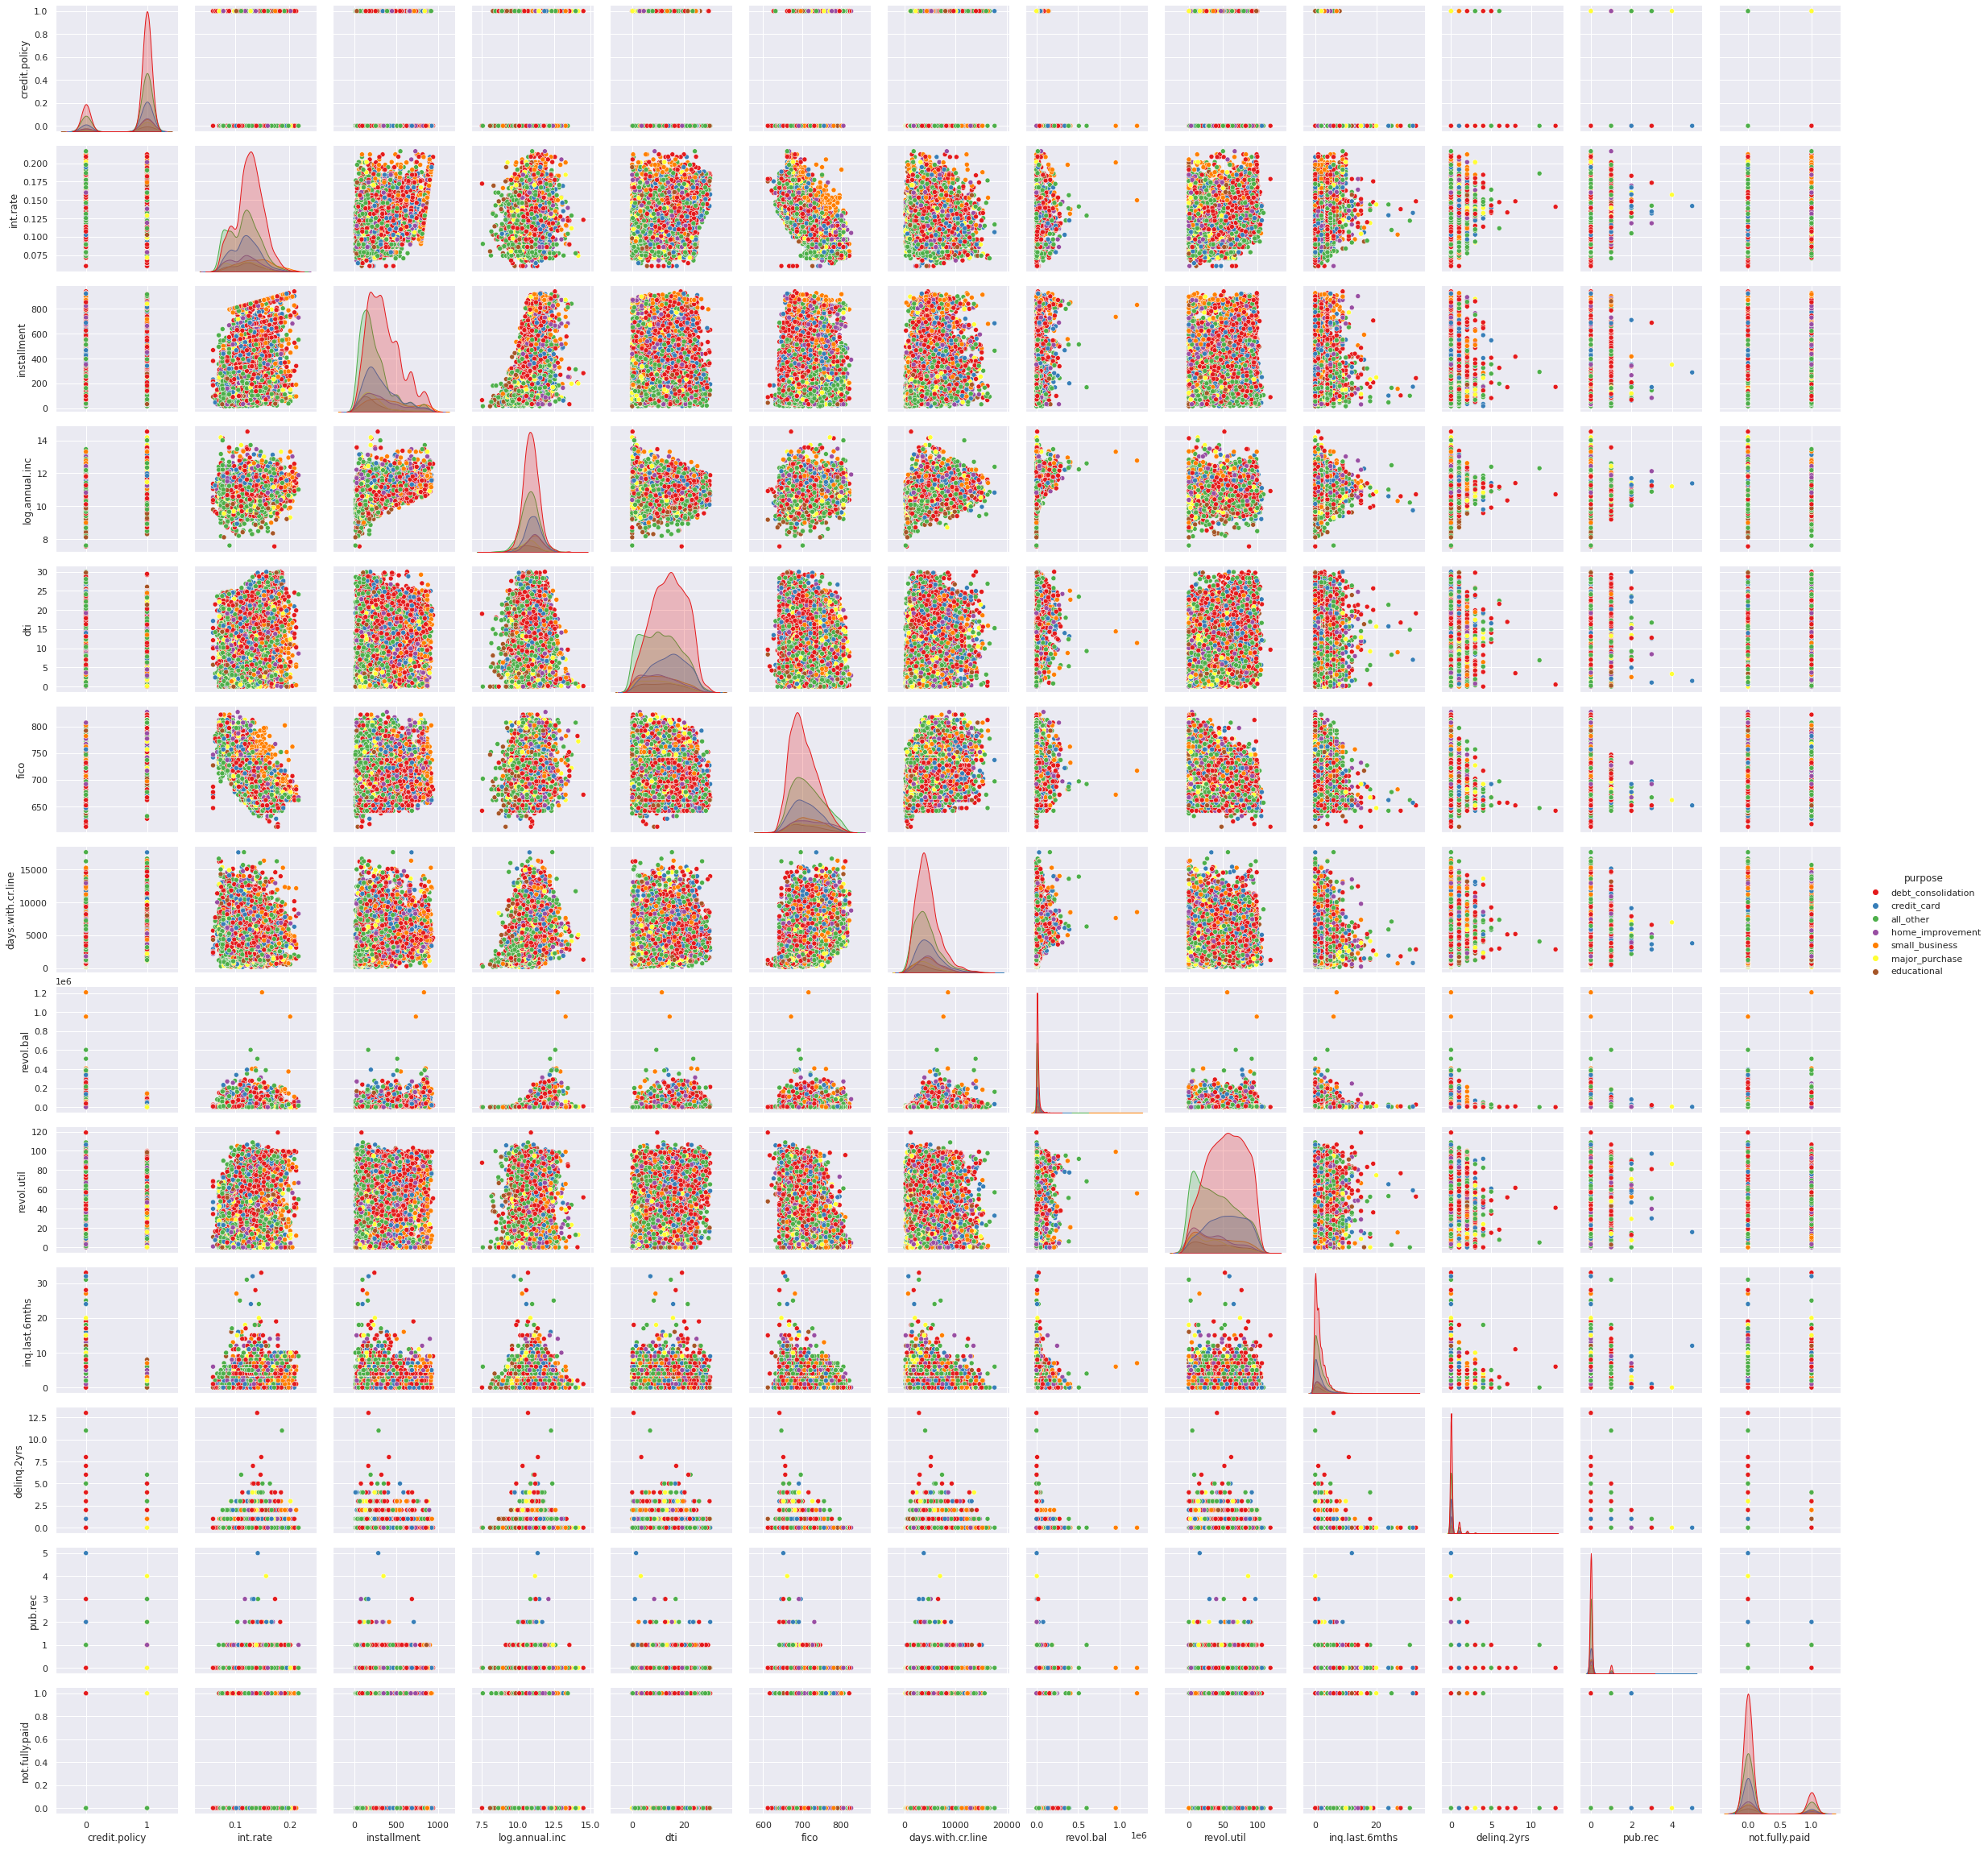

In [164]:
# Creating a pair plot
sns.pairplot(df,hue='purpose',palette='Set1')

#Train Test Split

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
# X is our feature selection, so we do not include our predictor
# y is our predictor
X = df_2.drop('purpose',axis=1)
y = df_2['purpose']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation

In [169]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.29      0.28      0.29       692
       credit_card       0.14      0.16      0.15       384
debt_consolidation       0.49      0.47      0.48      1206
       educational       0.07      0.08      0.08       103
  home_improvement       0.10      0.11      0.10       173
    major_purchase       0.06      0.07      0.06       137
    small_business       0.24      0.22      0.23       179

         micro avg       0.31      0.31      0.31      2874
         macro avg       0.20      0.20      0.20      2874
      weighted avg       0.32      0.31      0.32      2874



## Insight 1

We see the model is not very good at accurately predicting anything with certainty.
Only debt_consolidation is being predicted at a 49% accuracy. Which is not very good, but is the best overall.

In [170]:
print(confusion_matrix(y_test,predictions))

[[197  90 226  31  63  49  36]
 [ 88  61 160  15  21  20  19]
 [250 201 568  36  62  38  51]
 [ 39  15  26   8   4   5   6]
 [ 34  22  71   6  19  12   9]
 [ 36  16  49  10  12   9   5]
 [ 42  19  51   4  16   7  40]]


# Tree Visualization

In [171]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_2.columns[1:])
features

['purpose',
 'int.rate',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec']

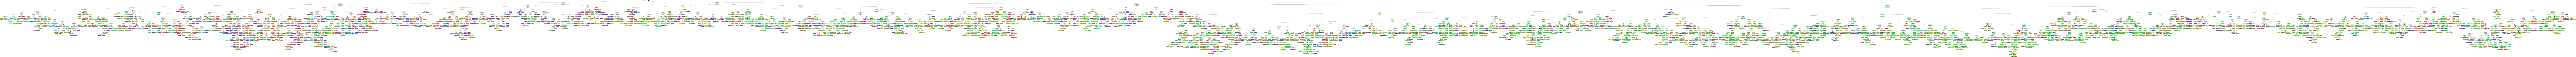

In [172]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

##Testing with credit policy removed

In [173]:
df_3 = df.drop(['installment','not.fully.paid', 'credit.policy'], axis = 1 )

In [174]:
# X is our feature selection, so we do not include our predictor
# y is our predictor
X = df_3.drop('purpose',axis=1)
y = df_3['purpose']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [176]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [177]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.29      0.29      0.29       660
       credit_card       0.16      0.17      0.17       381
debt_consolidation       0.50      0.47      0.48      1227
       educational       0.06      0.05      0.06       115
  home_improvement       0.08      0.08      0.08       189
    major_purchase       0.06      0.06      0.06       124
    small_business       0.17      0.21      0.19       178

         micro avg       0.31      0.31      0.31      2874
         macro avg       0.19      0.19      0.19      2874
      weighted avg       0.32      0.31      0.32      2874



## Insight 2

With credit policy removed
we see that the model performed worse
which is to be expected if you think about it in real terms
If the loan applicant had a credit policy with you already, you may have more history with them. Meaning you could predict where in their financial life cycle the person may have been in. Home buying phase, car buying phase, over burden with credit card debt, so on and so forth.

#Random Forests

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
rfc_pred = rfc.predict(X_test)

In [180]:
print(confusion_matrix(y_test, rfc_pred))

[[280  21 335   0   6   2  16]
 [ 75  24 272   0   6   0   4]
 [182  51 967   0  12   1  14]
 [ 54   6  50   1   2   0   2]
 [ 66   8 101   0   7   0   7]
 [ 58   1  60   1   0   1   3]
 [ 49   5  86   0   2   1  35]]


In [181]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

         all_other       0.37      0.42      0.39       660
       credit_card       0.21      0.06      0.10       381
debt_consolidation       0.52      0.79      0.62      1227
       educational       0.50      0.01      0.02       115
  home_improvement       0.20      0.04      0.06       189
    major_purchase       0.20      0.01      0.02       124
    small_business       0.43      0.20      0.27       178

         micro avg       0.46      0.46      0.46      2874
         macro avg       0.35      0.22      0.21      2874
      weighted avg       0.40      0.46      0.39      2874



## Insight 3

So in comparison to decision trees
there was an improvement in precision for debt_consolidation and small_business.

The algorithim is able to accurately predict those two types of loans 52% and 43% of the time respectively.

We had a trade off though, with no ability to predict a educational or major_purchase loan.

In [182]:
# Increasing trees to 500
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
rfc_pred = rfc.predict(X_test)

In [184]:
print(confusion_matrix(y_test, rfc_pred))

[[ 280   15  343    0    5    1   16]
 [  70   25  278    0    5    0    3]
 [ 169   36 1000    0    8    0   14]
 [  49    5   56    1    1    1    2]
 [  63    8   98    0    8    2   10]
 [  59    1   59    1    0    2    2]
 [  44    6   90    0    3    0   35]]


In [185]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

         all_other       0.38      0.42      0.40       660
       credit_card       0.26      0.07      0.10       381
debt_consolidation       0.52      0.81      0.63      1227
       educational       0.50      0.01      0.02       115
  home_improvement       0.27      0.04      0.07       189
    major_purchase       0.33      0.02      0.03       124
    small_business       0.43      0.20      0.27       178

         micro avg       0.47      0.47      0.47      2874
         macro avg       0.38      0.22      0.22      2874
      weighted avg       0.42      0.47      0.40      2874



## Insight 4
When the Random forest was increased to have 500 trees, we were able to see a dramatic improvement in educational loan accuracy. Which is at 50%.

small_business and debt_consolidation 
remained the same. all_other improved by 1%.
credit_card, home_improvement, 
and major_purchase had an increase.

## KNN Classification

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Using variable 'df_2' as the dataset

In [187]:
df_2.head()

credit.policy             purpose  ...  delinq.2yrs  pub.rec
0              1  debt_consolidation  ...            0        0
1              1         credit_card  ...            0        0
2              1  debt_consolidation  ...            0        0
3              1  debt_consolidation  ...            0        0
4              1         credit_card  ...            1        0

[5 rows x 12 columns]

In [188]:
# Importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [189]:
# Assigning the StandardScaler() function to scalar
scalar = StandardScaler()

In [190]:
# So we are dropping what we want to predict 'purpose' from the dataframe
# fitting a model afterwards
scalar.fit(df_2.drop('purpose', axis = 1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
scaled_features = scalar.transform(df_2.drop('purpose', axis = 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [192]:
df_2.columns

Index(['credit.policy', 'purpose', 'int.rate', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [193]:
df_2_col = df_2.drop(labels = 'purpose', axis = 1)

In [194]:
df_2_col.head()

credit.policy  int.rate  ...  delinq.2yrs  pub.rec
0              1    0.1189  ...            0        0
1              1    0.1071  ...            0        0
2              1    0.1357  ...            0        0
3              1    0.1008  ...            0        0
4              1    0.1426  ...            1        0

[5 rows x 11 columns]

In [195]:
df_feature = pd.DataFrame(data = scaled_features,
                          columns = df_2_col.columns[:])

In [196]:
df_feature.head()

credit.policy  int.rate  ...  delinq.2yrs   pub.rec
0       0.492222 -0.139318  ...    -0.299730 -0.237003
1       0.492222 -0.578868  ...    -0.299730 -0.237003
2       0.492222  0.486484  ...    -0.299730 -0.237003
3       0.492222 -0.813544  ...    -0.299730 -0.237003
4       0.492222  0.743509  ...     1.531147 -0.237003

[5 rows x 11 columns]

In [197]:
# Import train test split
from sklearn.model_selection import train_test_split

# Splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df_2['purpose'],
                                                    test_size = 0.30)

In [198]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [199]:
# Setting KNN Classifier to nearest neighbors 5
# and saving it to knn var
knn = KNeighborsClassifier(n_neighbors = 5)

In [200]:
# Fitting a model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [201]:
# Running predictions on X_test (testing data)
predict = knn.predict(X_test)

In [202]:
predict

array(['debt_consolidation', 'all_other', 'all_other', ..., 'all_other',
       'all_other', 'all_other'], dtype=object)

In [203]:
# Creating a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [204]:
# Confusion matrix print out
print(confusion_matrix(y_test, predict))

[[272  63 311   4  18  13   9]
 [105  51 197   1   6   4   6]
 [283 137 723   2  12   7  12]
 [ 46   9  51   2   7   1   0]
 [ 65  23  95   0   8   5   1]
 [ 45  10  66   0   3   5   3]
 [ 61  16  75   0   7   3  31]]


In [205]:
col_names = ['all_other','credit_card','debt_consol','edu','home_improv',
             'major_pur','small_bsns']

## KNN Insight
With a k = 5
We see that debt_consol and small_bsns 
has the best accuracy at over 48

Text(0.5, 1.0, 'Accuracy Score:0.37995824634655534')

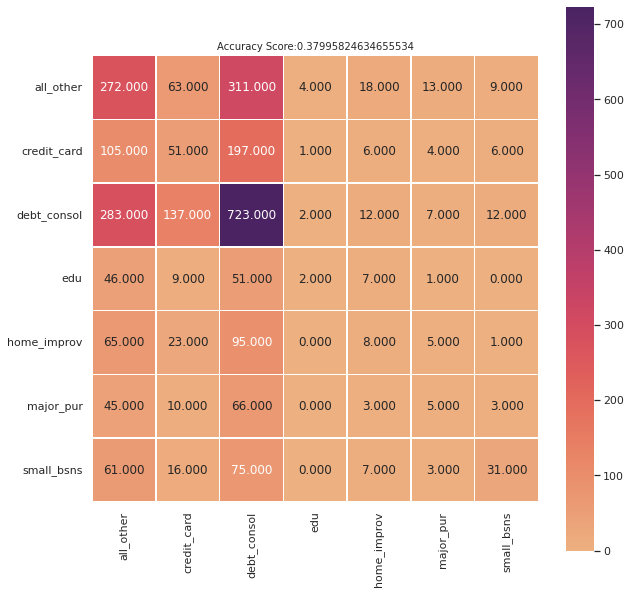

In [206]:
# Confusion matrix plotted for better interpretation

plt.figure(figsize = (10, 10))

sns.heatmap(confusion_matrix(y_test, predict),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare",
            xticklabels = col_names,
            yticklabels = col_names)
#plt.ylabel = ('Actual label')
#plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [207]:
print(classification_report(y_test, predict))

                    precision    recall  f1-score   support

         all_other       0.31      0.39      0.35       690
       credit_card       0.17      0.14      0.15       370
debt_consolidation       0.48      0.61      0.54      1176
       educational       0.22      0.02      0.03       116
  home_improvement       0.13      0.04      0.06       197
    major_purchase       0.13      0.04      0.06       132
    small_business       0.50      0.16      0.24       193

         micro avg       0.38      0.38      0.38      2874
         macro avg       0.28      0.20      0.20      2874
      weighted avg       0.35      0.38      0.35      2874



In [208]:
# Running to see which k value to use
# This is a place holder for Accuracy
from sklearn import metrics
score = []

In [209]:
# Running KNN from 1 to 40 for nearest neighbors and seeing the scores for accuracy
# storing these results in the score variable
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.31419624217118997, 0.3166318719554628, 0.35803757828810023, 0.3782185107863605, 0.37995824634655534, 0.3942240779401531, 0.40501043841336115, 0.4032707028531663, 0.406750173973556, 0.40988169798190677, 0.42519137091162146, 0.4231036882393876, 0.4286708420320111, 0.4324982602644398, 0.43041057759220597, 0.43458594293667363, 0.4387613082811413, 0.4352818371607516, 0.44119693806541405, 0.44572025052192066, 0.44363256784968685, 0.4450243562978427, 0.44258872651356995, 0.4474599860821155, 0.44815588030619347, 0.4488517745302714, 0.44815588030619347, 0.45024356297842727, 0.4474599860821155, 0.4498956158663883, 0.4488517745302714, 0.4488517745302714, 0.4523312456506611, 0.4488517745302714, 0.4488517745302714, 0.4495476687543493, 0.4519832985386221, 0.44711203897007656, 0.44676409185803756]


Text(0, 0.5, 'Testing Accuracy')

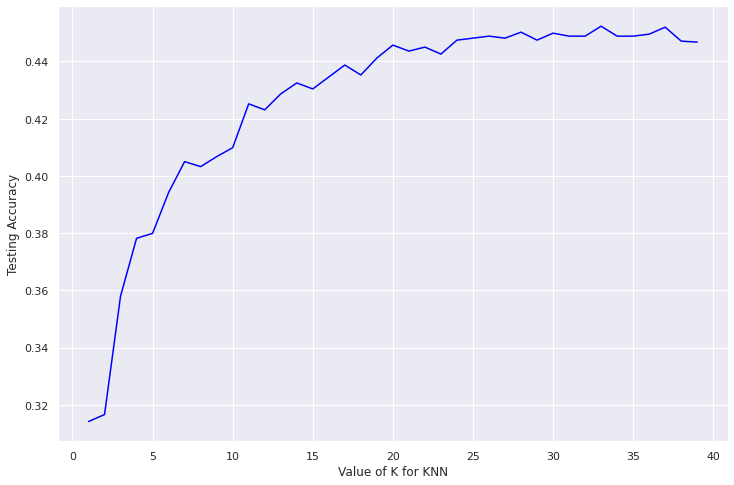

In [210]:
# Creating a plot to see how the K value affects accuracy
# from K values 1 to 39
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [211]:
# Running KNN from 1 to 40 for nearest neighbors and seeing the error rate
# storing these results in the error_rate variable
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

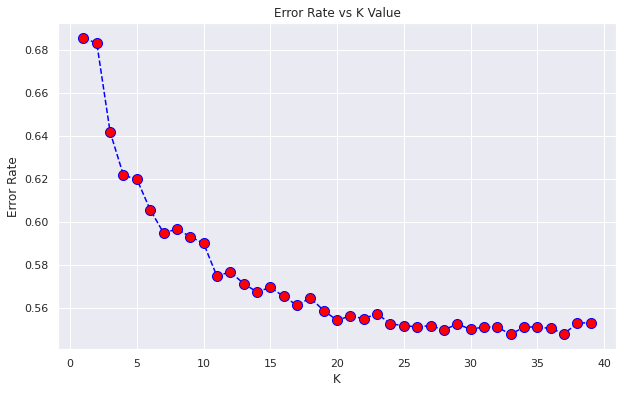

In [212]:
# Plotting the error rate to see how it interacts with the previous chart which shows accuracy
# seems k = 15 would be ideal to select 
# in terms of lower error rate (0.045%), and satisfactory accuracy of 93.5%

plt.figure(figsize = (10,6))
plt.plot(
         range(1,40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10
         )
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")